#7: Sentiment Analysis: Twitter dataset

##Training and validataion

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
#/content/twitter_training.csv

In [7]:
df_train = pd.read_csv('/content/twitter_training.csv', header = None)

In [38]:
df_train.head()

,ID,Category,Sentiment,Text
0,2401,Borderlands,Positive,im getting borderlands murder
1,2401,Borderlands,Positive,coming borders kill
2,2401,Borderlands,Positive,im getting borderlands kill
3,2401,Borderlands,Positive,im coming borderlands murder
4,2401,Borderlands,Positive,im getting borderlands murder


In [9]:
df_train.columns = ['ID', 'Category', 'Sentiment', 'Text']


In [11]:
df_train.columns

Index(['ID', 'Category', 'Sentiment', 'Text'], dtype='object')

In [13]:
df_test = pd.read_csv('/content/twitter_validation.csv', header = None)

In [15]:
df_test.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [17]:
df_test.columns = ['ID', 'Category', 'Sentiment', 'Text']

In [19]:
df_test.columns

Index(['ID', 'Category', 'Sentiment', 'Text'], dtype='object')

In [20]:
df_train.isnull().sum()


ID             0
Category       0
Sentiment      0
Text         686
dtype: int64

In [21]:
df_test.isnull().sum()


ID           0
Category     0
Sentiment    0
Text         0
dtype: int64

In [22]:
df_train = df_train.dropna()

In [24]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

def remove_symbols(text):
    pattern = r'[^A-Za-z\s]'
    text = re.sub(pattern, '', text)
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return text

# Clean text column
df_train['Text'] = df_train['Text'].apply(lambda x: remove_html_tags(x))
df_train['Text'] = df_train['Text'].apply(lambda x: remove_symbols(x))

df_test['Text'] = df_test['Text'].apply(lambda x: remove_html_tags(x))
df_test['Text'] = df_test['Text'].apply(lambda x: remove_symbols(x))

<ipython-input-25-9b6a6875fbae>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')
<ipython-input-25-9b6a6875fbae>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [28]:
X_train = df_train['Text']
y_train = df_train.Sentiment

X_test = df_test['Text']
y_test = df_test.Sentiment

In [29]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [30]:
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [31]:
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)

In [32]:
print(f'Acc: {round(score*100, 2)}%')


Acc: 95.0%


In [33]:
confusion_matrix(y_test, y_pred, labels = ['Neutral', 'Positive', 'Negative'])

array([[273,   4,   3],
       [  2, 259,  12],
       [  2,   6, 254]])

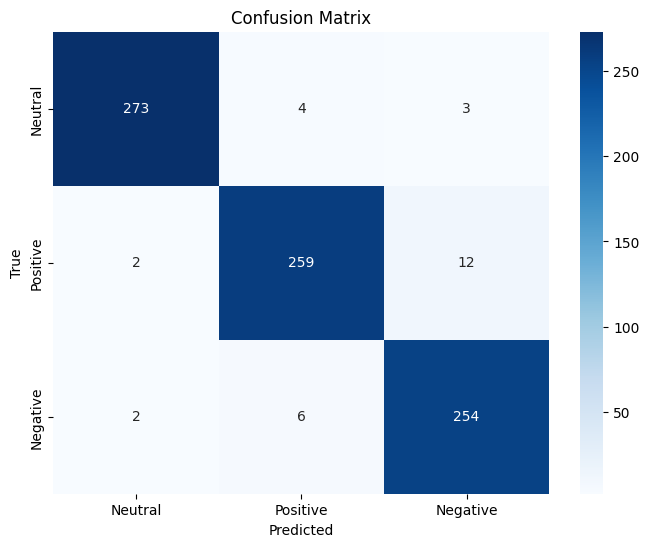

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
labels = ['Neutral', 'Positive', 'Negative']
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
